# Case Study: Classification of Fashion Class

# 1. Problem Statement & Business Case

- Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
- Here is an example how the data look like along with its Class Numbers

- [Source: Data Set](https://github.com/zalandoresearch/fashion-mnist)
#### These are the 10 classes:

  - 0 - T-shirt/top
  - 1 - Trouser
  - 2 - Pullover
  - 3 - Dress
  - 4 - Coat
  - 5 - Sandal
  - 6 - Shirt
  - 7 - Sneaker
  - 8 - Bag
  - 9 - Ankle boot

![Image](https://i.imgur.com/5ZFEX9b.png)

***

# 2. Importing Libraries & Data Set

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To Ignore warnings given by Jupyter Notebook about future deprecations 
import random

- Reading the Data files using Pandas read_csv command

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

***

# 3. Data Visualization

In [3]:
# The head of the training dataset
# 785 columns indicates 784 cols of - 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#The last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Similarly for the Test Dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
# The Shape of training set & testing set
fashion_train_df.shape, fashion_test_df.shape

((60000, 785), (10000, 785))

In [8]:
# Create training and testing arrays to ease our operation of visualization
# Arrays can be created using np.array command and convert the data type to float32 bit for future divisions
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
# The shapes of training & testing arrays
training.shape, testing.shape

((60000, 785), (10000, 785))

4.0

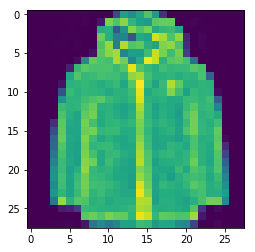

In [10]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28)) ) # reshape and plot the image
training[i,0]

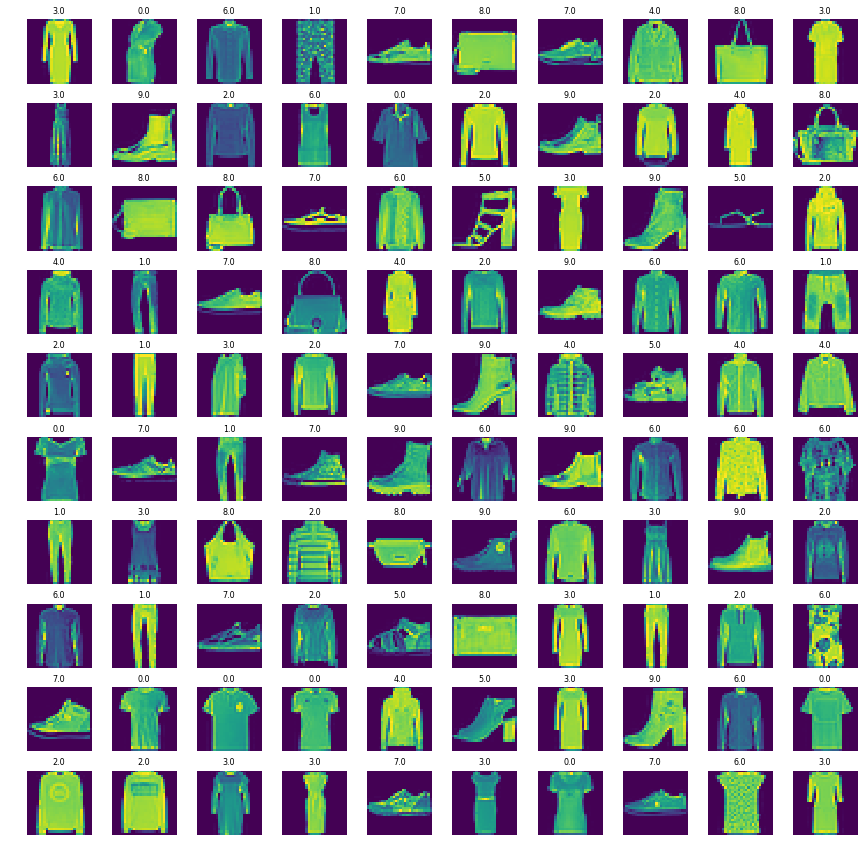

In [11]:
# Let's view some images in a grid format
# Define the dimensions of the plot grid 
rows = 10
cols = 10

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (15,15))

axes = axes.ravel() # to flaten the 15 x 15 matrix into 225 array


for i in np.arange(0, rows*cols): # create evenly spaces variables 
    # Select a random number from 0 to len(training)
    num = np.random.randint(0, len(training))
    # read and display an image with the selected index    
    axes[i].imshow(training[num,1:].reshape((28,28)) )
    axes[i].set_title(training[num,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

***

# 4. Training the Model

In [12]:
# Prepare the training and testing dataset into range of 0 and 1 to obtain better accurate results
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
# Split the train Data set into train & validate to validate the model accuracy independent of test datset

from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 25)

In [14]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape

((48000, 784), (48000,), (12000, 784), (12000,))

### Creating a series of images to prepare for neural networks by reshaping the train & test values

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [16]:
X_train.shape, X_validate.shape, X_test.shape
# The below shaped indicates (48000,28,28,1)
# 48000 ---> No of Images or data rows
# 28 ------> Dimensions of image in pixels (28 Horizontal)
# 28 ------> Dimensions of image in pixels (28 Vertical)
# 1 -------> No of colored layers present on the image / thickness of color layer (in case of 1 it's gray, 3 it's RGB)

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

***

# 5. Neural Networks

In [17]:
# Importing required libraries
import keras
from keras.models import Sequential # To read and load Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # For Network
from keras.optimizers import Adam

Using TensorFlow backend.


In [18]:
# Creating our model instance in a variable
cnn_model = Sequential()

# Trying with 32 Kernels
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

# We have 10 nos of classes to be identified, lets take 10 Nos a output layer of networks
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# The summary of our model
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the neural networks using a loss and an optimizer
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [21]:
epochs = 50 # The no. of times the data enters through the created network
# FIt the data with our reshaped train values and validate with our splitted validation data set
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s 577us/step - loss: 0.8819 - acc: 0.7207 - val_loss: 0.4749 - val_acc: 0.8406
Epoch 2/50
48000/48000 [==============================] - 23s 481us/step - loss: 0.4430 - acc: 0.8438 - val_loss: 0.4125 - val_acc: 0.8558
Epoch 3/50
48000/48000 [==============================] - 23s 479us/step - loss: 0.3802 - acc: 0.8663 - val_loss: 0.3705 - val_acc: 0.8731
Epoch 4/50
48000/48000 [==============================] - 23s 477us/step - loss: 0.3537 - acc: 0.8766 - val_loss: 0.3454 - val_acc: 0.8821
Epoch 5/50
48000/48000 [==============================] - 23s 478us/step - loss: 0.3340 - acc: 0.8817 - val_loss: 0.3403 - val_acc: 0.8837
Epoch 6/50
48000/48000 [==============================] - 24s 505us/step - loss: 0.3169 - acc: 0.8874 - val_loss: 0.3217 - val_acc: 0.8871
Epoch 7/50
48000/48000 [==============================] - 24s 492us/

***

# 6. Evaluating the Model

In [22]:
# Use inbuilt evaluate command to obtain the accuracy
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 196us/step
Test Accuracy : 0.914


In [23]:
# Obtain the predictions for the test data using the model created
predicted_classes = cnn_model.predict_classes(X_test)

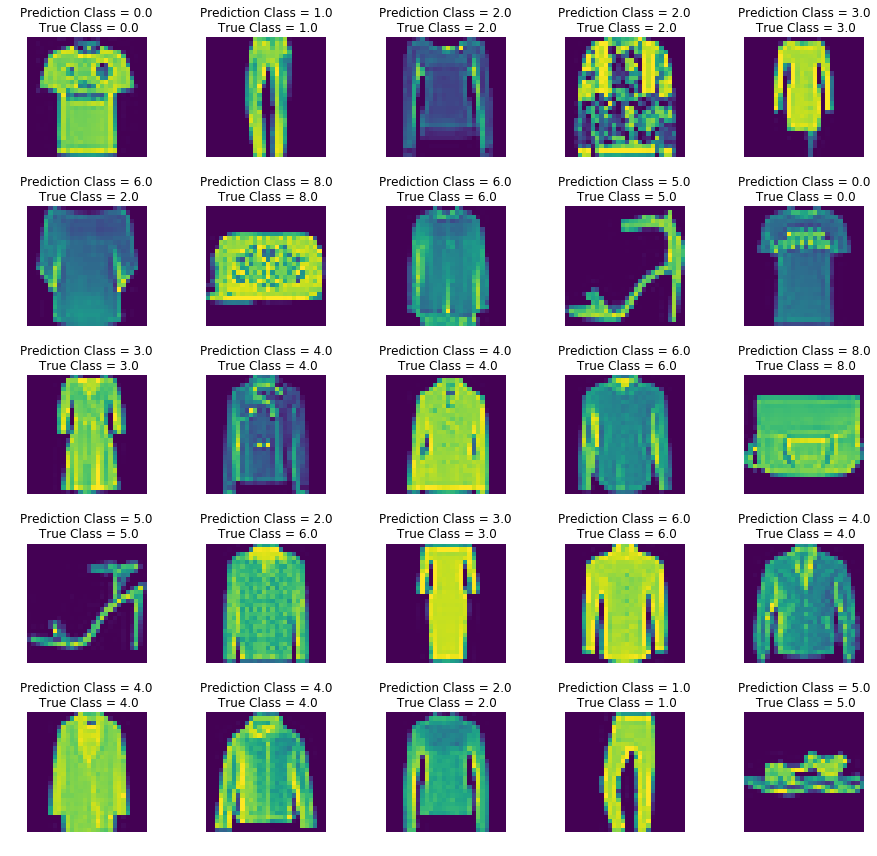

In [24]:
# The Visualization of Predicted Class & True class in a 5*5 Grid
rows = 5
cols = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, rows * cols):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off') # To make it cluster free
plt.subplots_adjust(wspace=0.5) # The amount of space provided between images

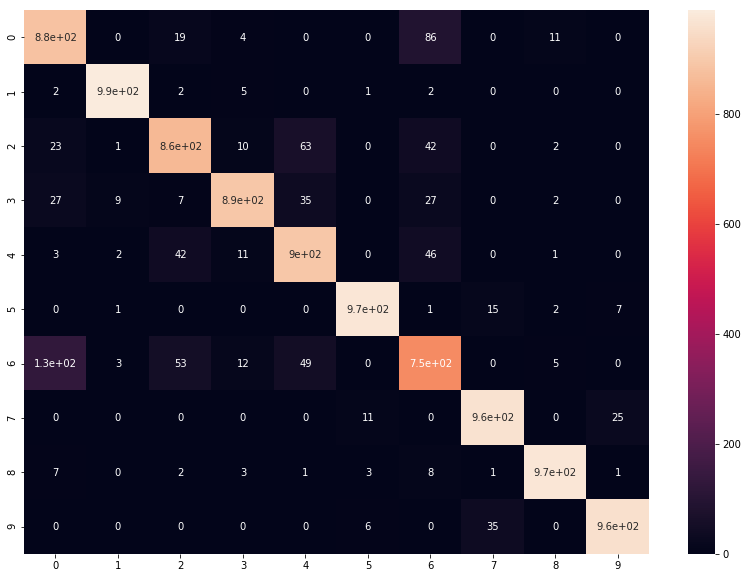

In [25]:
# The visualization of Properly predicted values using a heat map & confusion matrix for each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [26]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.87      0.86      0.87      1000
     Class 3       0.95      0.89      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.78      0.75      0.76      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.97      0.96      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



***

# Summary

- The model obtained is 94% accurate with the training dataset & 91% accurate with validation data set
- Model predicted 93% of accurate results with test data set taken
- This model can be further used for any 28*28 image class predictions.
- Maintaining a higher epochs gives us better test data predictions.